<a href="https://colab.research.google.com/github/vansh123321/Projects/blob/master/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas_datareader import data
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [ ]:
#Pulling Historical Data From Yahoo
tickers = ['AAPL'] #enter stock name
start_date = '2015-01-01'
end_date = '2020-01-01'
data = data.DataReader('INPX', 'yahoo', start_date, end_date).reset_index()


In [ ]:
data.head(1)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,1668600.0,1409400.0,1668600.0,1652400.0,0.0,1652400.0


#**Prophet**

**The Prophet is a procedure for forecasting time series data based on an suppliment model where nonlinear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well**

In [ ]:
pr = data.loc[:,["Date","Close"]]
pr = pr.rename(columns={"Date": "ds", "Close": "y"})
pr.head()

,ds,y
0,2015-01-02,1652400.0
1,2015-01-05,1490400.0
2,2015-01-06,1603800.0
3,2015-01-07,1636200.0
4,2015-01-08,1733400.0


In [ ]:
m=Prophet()
m.fit(pr)
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,1.369289e+06,1.220031e+06,1.447656e+06,1.369289e+06,1.369289e+06,-35903.761904,-35903.761904,-35903.761904,-55757.437651,-55757.437651,-55757.437651,19853.675747,19853.675747,19853.675747,0.0,0.0,0.0,1.333385e+06
1,2015-01-05,1.371845e+06,1.232942e+06,1.466876e+06,1.371845e+06,1.371845e+06,-20241.791344,-20241.791344,-20241.791344,-54316.728717,-54316.728717,-54316.728717,34074.937373,34074.937373,34074.937373,0.0,0.0,0.0,1.351604e+06
2,2015-01-06,1.372698e+06,1.237645e+06,1.471640e+06,1.372698e+06,1.372698e+06,-15144.936381,-15144.936381,-15144.936381,-53193.398950,-53193.398950,-53193.398950,38048.462569,38048.462569,38048.462569,0.0,0.0,0.0,1.357553e+06
3,2015-01-07,1.373550e+06,1.243649e+06,1.480562e+06,1.373550e+06,1.373550e+06,-12985.720041,-12985.720041,-12985.720041,-54489.113185,-54489.113185,-54489.113185,41503.393144,41503.393144,41503.393144,0.0,0.0,0.0,1.360564e+06
4,2015-01-08,1.374402e+06,1.249193e+06,1.482075e+06,1.374402e+06,1.374402e+06,-7479.287877,-7479.287877,-7479.287877,-51850.195022,-51850.195022,-51850.195022,44370.907145,44370.907145,44370.907145,0.0,0.0,0.0,1.366923e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2020-01-26,6.054152e+04,6.268459e+04,3.138501e+05,5.925632e+04,6.185316e+04,125392.328687,125392.328687,125392.328687,134803.436770,134803.436770,134803.436770,-9411.108084,-9411.108084,-9411.108084,0.0,0.0,0.0,1.859338e+05
1284,2020-01-27,6.056095e+04,-1.246711e+05,1.049896e+05,5.896657e+04,6.209658e+04,-69567.915041,-69567.915041,-69567.915041,-54316.728717,-54316.728717,-54316.728717,-15251.186324,-15251.186324,-15251.186324,0.0,0.0,0.0,-9.006968e+03
1285,2020-01-28,6.058038e+04,-1.265887e+05,9.927549e+04,5.886148e+04,6.234069e+04,-74047.845936,-74047.845936,-74047.845936,-53193.398949,-53193.398949,-53193.398949,-20854.446986,-20854.446986,-20854.446986,0.0,0.0,0.0,-1.346747e+04
1286,2020-01-29,6.059980e+04,-1.295425e+05,9.944458e+04,5.876164e+04,6.255492e+04,-80632.548559,-80632.548559,-80632.548559,-54489.113185,-54489.113185,-54489.113185,-26143.435374,-26143.435374,-26143.435374,0.0,0.0,0.0,-2.003274e+04


In [ ]:
import plotly.offline as py
fig = plot_plotly(m, forecast)
py.iplot(fig) 


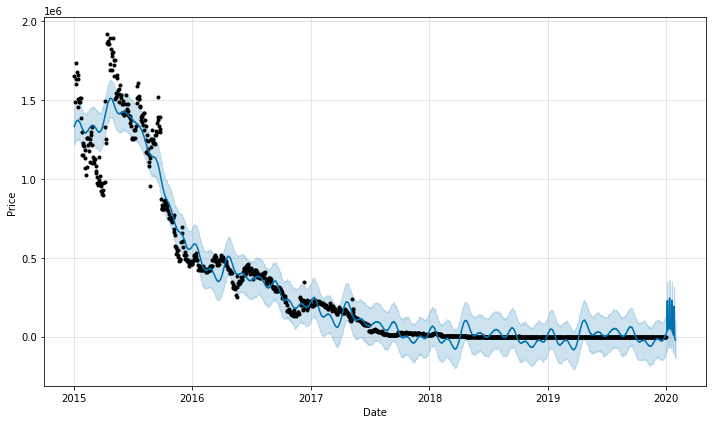

In [ ]:
fig = m.plot(forecast,xlabel='Date',ylabel='Price')


#**Autoregression**

**Autoregression in a time series model that uses observations from previous time data as input to a regression equation to predict the value at the next time value. It is a very simple idea that can result in accurate forecasts on a range of time series problems.**

In [ ]:
from statsmodels.tsa.ar_model import AR
ar = AR(pr.y)
ar_fit = ar.fit()
print(ar_fit.summary())

                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                 1258
Model:                         AR(23)   Log Likelihood              -14744.309
Method:                          cmle   S.D. of innovations          37040.725
Date:                Tue, 21 Jul 2020   AIC                             21.080
Time:                        17:35:09   BIC                             21.184
Sample:                             0   HQIC                            21.119
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.8080   1290.531     -0.115      0.909   -2677.202    2381.586
L1.y           0.8589      0.029     29.896      0.000       0.803       0.915
L2.y           0.0363      0.038      0.960      0.3

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




#**Simple Exponential Smoothing (SES)**

**Simple Exponential Smoothing (SES) is a time series forecasting method for univariate data without a trend or seasonality. It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient. Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time.**

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses = SimpleExpSmoothing(pr.y)
ses_fit = ses.fit()
print(ses_fit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                 1258
Model:             SimpleExpSmoothing   SSE                  2097669049886.677
Optimized:                       True   AIC                          26717.088
Trend:                           None   BIC                          26727.363
Seasonal:                        None   AICC                         26717.120
Seasonal Periods:                None   Date:                 Tue, 21 Jul 2020
Box-Cox:                        False   Time:                         17:35:09
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8479974                alpha                 True
initial_level             1.6377e+06                

#**Holt Winters Exponential Smoothing (HWES)**

**Holt Winters Exponential Smoothing (HWES) is a forecasting algorithm that allows users to smooth a time series and use that data to forecast areas of interest. Exponential smoothing assigns exponentially decreasing weights and values against historical data to decrease the value of the weight for the older data**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwes = ExponentialSmoothing(pr.y)
hwes_fit = hwes.fit()
print(hwes_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 1258
Model:             ExponentialSmoothing   SSE                  2097669049886.677
Optimized:                         True   AIC                          26717.088
Trend:                             None   BIC                          26727.363
Seasonal:                          None   AICC                         26717.120
Seasonal Periods:                  None   Date:                 Tue, 21 Jul 2020
Box-Cox:                          False   Time:                         17:35:09
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8479974                alpha                 True
initial_level             1.6377e+

#**Moving average (MA)**

**Moving average (MA) is a stock indicator that is commonly used in technical analysis. It's a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days. Also a moving average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean or rolling mean and is a type of finite impulse response filter. Variations include: simple, and cumulative, or weighted forms.**

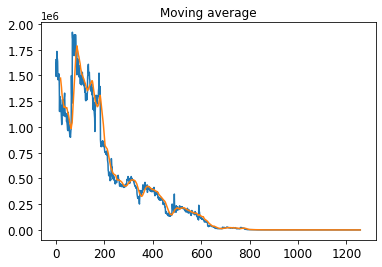

In [ ]:
import matplotlib.pyplot as plt
ax = pr['y'].plot(title="Moving average", fontsize=12)
moving_average = pr['y'].rolling(20).mean()
moving_average.plot(label='Rolling mean', ax=ax)
plt.show()

#**Autoregressive conditional heteroskedasticity(ARCH)**

**Autoregressive conditional heteroskedasticity(ARCH) identifies non constant volatility when future periods of high and low volatility cannot be identified. Also it is a time-series statistical model used to analyze effects left unexplained by econometric models. In these models, the error term is the residual result left unexplained by the model.**

In [ ]:
!pip install arch

In [ ]:
from arch import arch_model
arch = arch_model(pr.y, vol='GARCH')
arch_fit = arch.fit()
print(arch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 17633.36783098193
Iteration:      2,   Func. Count:     13,   Neg. LLF: 17623.03052154526
Iteration:      3,   Func. Count:     19,   Neg. LLF: 17549.983319911218
Iteration:      4,   Func. Count:     25,   Neg. LLF: 17549.955181809044
Iteration:      5,   Func. Count:     31,   Neg. LLF: 17549.933782737724
Iteration:      6,   Func. Count:     37,   Neg. LLF: 17549.933764998437
Iteration:      7,   Func. Count:     43,   Neg. LLF: 17549.933761830427
Iteration:      8,   Func. Count:     49,   Neg. LLF: 17549.933744394028
Iteration:      9,   Func. Count:     55,   Neg. LLF: 17549.933642931624
Iteration:     10,   Func. Count:     61,   Neg. LLF: 17549.933061455096
Iteration:     11,   Func. Count:     67,   Neg. LLF: 17549.931315577254
Iteration:     12,   Func. Count:     73,   Neg. LLF: 17549.92257408444
Iteration:     13,   Func. Count:     79,   Neg. LLF: 17549.878841658614
Iteration:     14,   Func. Count:     85,   Neg. LLF: 

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.29e+11. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.0001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




**GARCH Model**

In [ ]:
from arch import arch_model
arch = arch_model(pr.y, vol='GARCH')
arch_fit = arch.fit()
print(arch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 17633.36783098193
Iteration:      2,   Func. Count:     13,   Neg. LLF: 17623.03052154526
Iteration:      3,   Func. Count:     19,   Neg. LLF: 17549.983319911218
Iteration:      4,   Func. Count:     25,   Neg. LLF: 17549.955181809044
Iteration:      5,   Func. Count:     31,   Neg. LLF: 17549.933782737724
Iteration:      6,   Func. Count:     37,   Neg. LLF: 17549.933764998437
Iteration:      7,   Func. Count:     43,   Neg. LLF: 17549.933761830427
Iteration:      8,   Func. Count:     49,   Neg. LLF: 17549.933744394028
Iteration:      9,   Func. Count:     55,   Neg. LLF: 17549.933642931624
Iteration:     10,   Func. Count:     61,   Neg. LLF: 17549.933061455096
Iteration:     11,   Func. Count:     67,   Neg. LLF: 17549.931315577254
Iteration:     12,   Func. Count:     73,   Neg. LLF: 17549.92257408444
Iteration:     13,   Func. Count:     79,   Neg. LLF: 17549.878841658614
Iteration:     14,   Func. Count:     85,   Neg. LLF: 

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.29e+11. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.0001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




#**Autoregressive Moving Average (ARMA)**

 **Autoregressive Moving Average (ARMA)  In the statistical analysis of time series, autoregressive–moving-average models provide a close description of a stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average.**


In [ ]:
from statsmodels.tsa.stattools import ARMA
arma = ARMA(pr.y, order=(1,1)) 
arma_fit = arma.fit(disp=0)
print(arma_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1258
Model:                     ARMA(1, 1)   Log Likelihood              -15144.741
Method:                       css-mle   S.D. of innovations          40844.685
Date:                Tue, 21 Jul 2020   AIC                          30297.483
Time:                        17:35:16   BIC                          30318.032
Sample:                             0   HQIC                         30305.205
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.227e+05   6.49e+05      0.497      0.619   -9.49e+05    1.59e+06
ar.L1.y        0.9988      0.002    623.119      0.000       0.996       1.002
ma.L1.y       -0.1520      0.031     -4.850      0.0

#**Autoregressive Integrated Moving Average (ARIMA)**

**Autoregressive Integrated Moving Average (ARIMA) in time series analysis, an autoregressive integrated moving average model is a generalization of an autoregressive moving average model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the time series model.**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(pr.y, order=(1,1,2)) 
arima_fit = arima.fit(disp=0)
print(arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1257
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -15123.713
Method:                       css-mle   S.D. of innovations          40645.399
Date:                Tue, 21 Jul 2020   AIC                          30257.427
Time:                        17:35:16   BIC                          30283.109
Sample:                             1   HQIC                         30267.079
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1314.5545    893.928     -1.471      0.141   -3066.622     437.513
ar.L1.D.y      0.0129      0.158      0.082      0.935      -0.296       0.322
ma.L1.D.y     -0.1505      0.155     -0.969      0.3

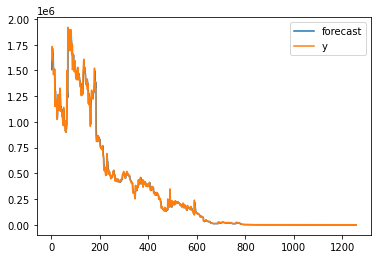

In [ ]:
import matplotlib.pyplot as plt
arima_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
!pip install pmdarima


**AUTO ARIMA Model**

**Auto Arima is the automatic version of arima**

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(pr.y, start_p=1, start_q=1,
                      test='adf',       
                      max_p=2, max_q=2,
                      m=1,               
                      d=None,          
                      seasonal=False,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_arima.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=30256.500, BIC=30277.046, Time=0.527 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=30285.680, BIC=30295.953, Time=0.061 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=30254.659, BIC=30270.069, Time=0.101 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=30254.017, BIC=30269.426, Time=0.163 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=30284.959, BIC=30290.096, Time=0.040 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=30256.386, BIC=30276.932, Time=0.232 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=30258.245, BIC=30283.927, Time=0.772 seconds
Total fit time: 1.926 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -15124.008
Date:                Tue, 21 Ju

**SARIMA Model**

**SARIMA is Season + Arima**

In [ ]:
sdata = pr
sdata['ds'] = pd.to_datetime(sdata['ds']).dt.normalize()
sdata= sdata[sdata['ds'].dt.day ==1]


In [ ]:
import pmdarima as pm
sarima_model = pm.auto_arima(pr.y, start_p=1, start_q=1,
                      test='adf',       
                      max_p=2, max_q=2,
                      m=12,               
                      d=None,          
                      seasonal=True,   
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(sarima_model.summary())


Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=30851.319, BIC=30876.957, Time=3.757 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=32726.063, BIC=32736.319, Time=0.098 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=31012.160, BIC=31032.671, Time=3.644 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=31928.659, BIC=31949.169, Time=2.908 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=32743.502, BIC=32748.629, Time=0.102 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=31439.139, BIC=31459.650, Time=1.224 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=30841.363, BIC=30872.129, Time=5.439 seconds
Fit ARIMA(1,0,1)x(1,1,0,12) [intercept=True]; AIC=31009.093, BIC=31034.731, Time=3.956 seconds
Fit ARIMA(1,0,1)x(2,1,1,12) [intercept=True]; AIC=30840.868, BIC=30876.762, Time=16.884 seconds
Fit ARIMA(1,0,1)x(2,1,0,12) [intercept=True]; AIC=30885.113, BIC=30915.879, Time=11.218 seconds
Fit 

#**LSTM**

**LSTM also known as Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning and time series analytics. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points, but also entire sequences of data.**

In [ ]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
lstm = data
data = lstm.filter(['Close'])
dataset = data.values 
training_data_len = math.ceil(len(dataset)*.75)  
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
model.summary()
from tensorflow.keras.utils import plot_model 
plot_model(model, to_file='model1.png')


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=85, epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 60, 64)            16896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 52,033
Trainable params: 52,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
884/884 [==============================] - 3s 3ms/step - loss: 0.0257
Epoch 2/10
884/884 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 3/10
884/884 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch

#**ADFULLER**

**Adfuller known as augmented Dickey–Fuller test tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.**

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(pr.y)
(result)

(-1.957424131121932,
 0.30554729217364873,
 21,
 1236,
 {'1%': -3.435651725648415,
  '10%': -2.568016498910778,
  '5%': -2.863881223119536},
 29510.534400043824)